# NDVI with numpy

This program tests NDVI calculation on a 500x375 RGN image

In [98]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

### Open and display the image 

Image has resolution 500 x 375


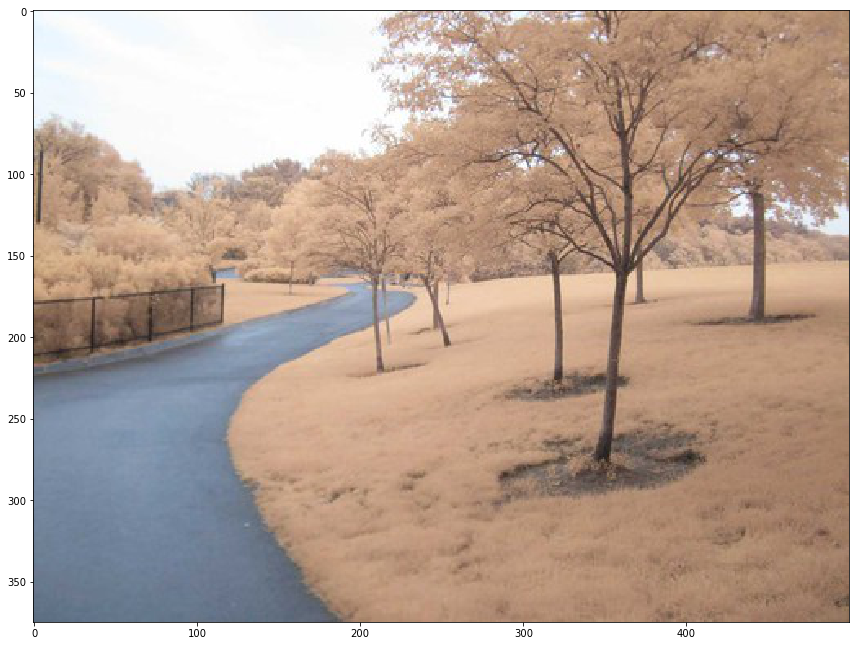

In [44]:
disp_size = (15,11.25)
im = Image.open('../Images/river.jpg')
im.convert('RGB')
plt.figure(figsize=disp_size) #figszie specified in inches
plt.imshow(im, interpolation='nearest') #renders after this block executes

im = np.array(im)   #height x width x 3 numpy array

red, green, blue = im.T # Temporarily unpack the bands for readability
print("Image has resolution", len(blue), "x", len(blue.T))

## Decompose into R-, -G-, -N images

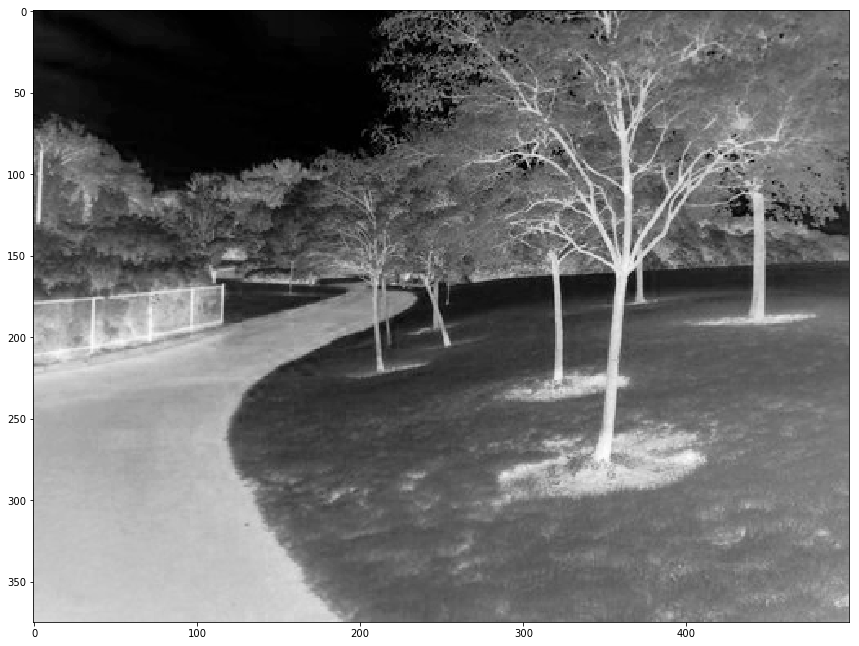

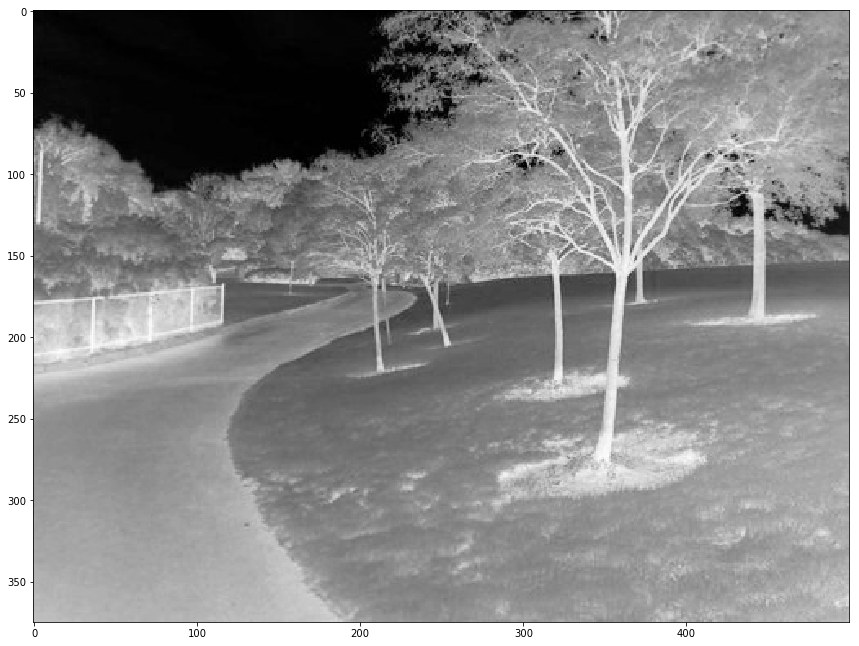

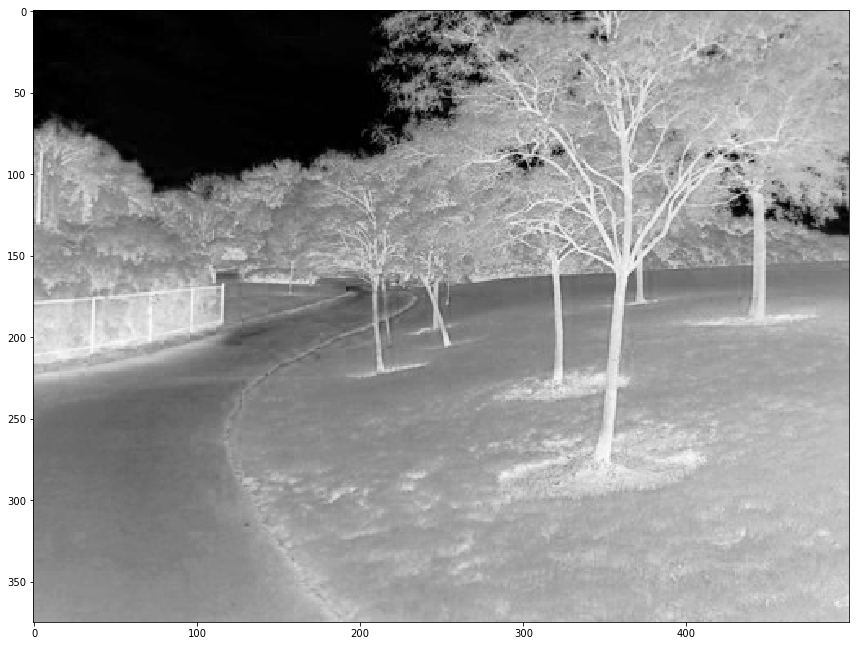

In [45]:
plt.figure(figsize=disp_size)
plt.imshow(red.T, interpolation='nearest', cmap="Greys")
plt.figure(figsize=disp_size)
plt.imshow(green.T, interpolation='nearest', cmap="Greys")
plt.figure(figsize=disp_size)
plt.imshow(blue.T, interpolation='nearest', cmap="Greys")

## Convert to NDVI image and show

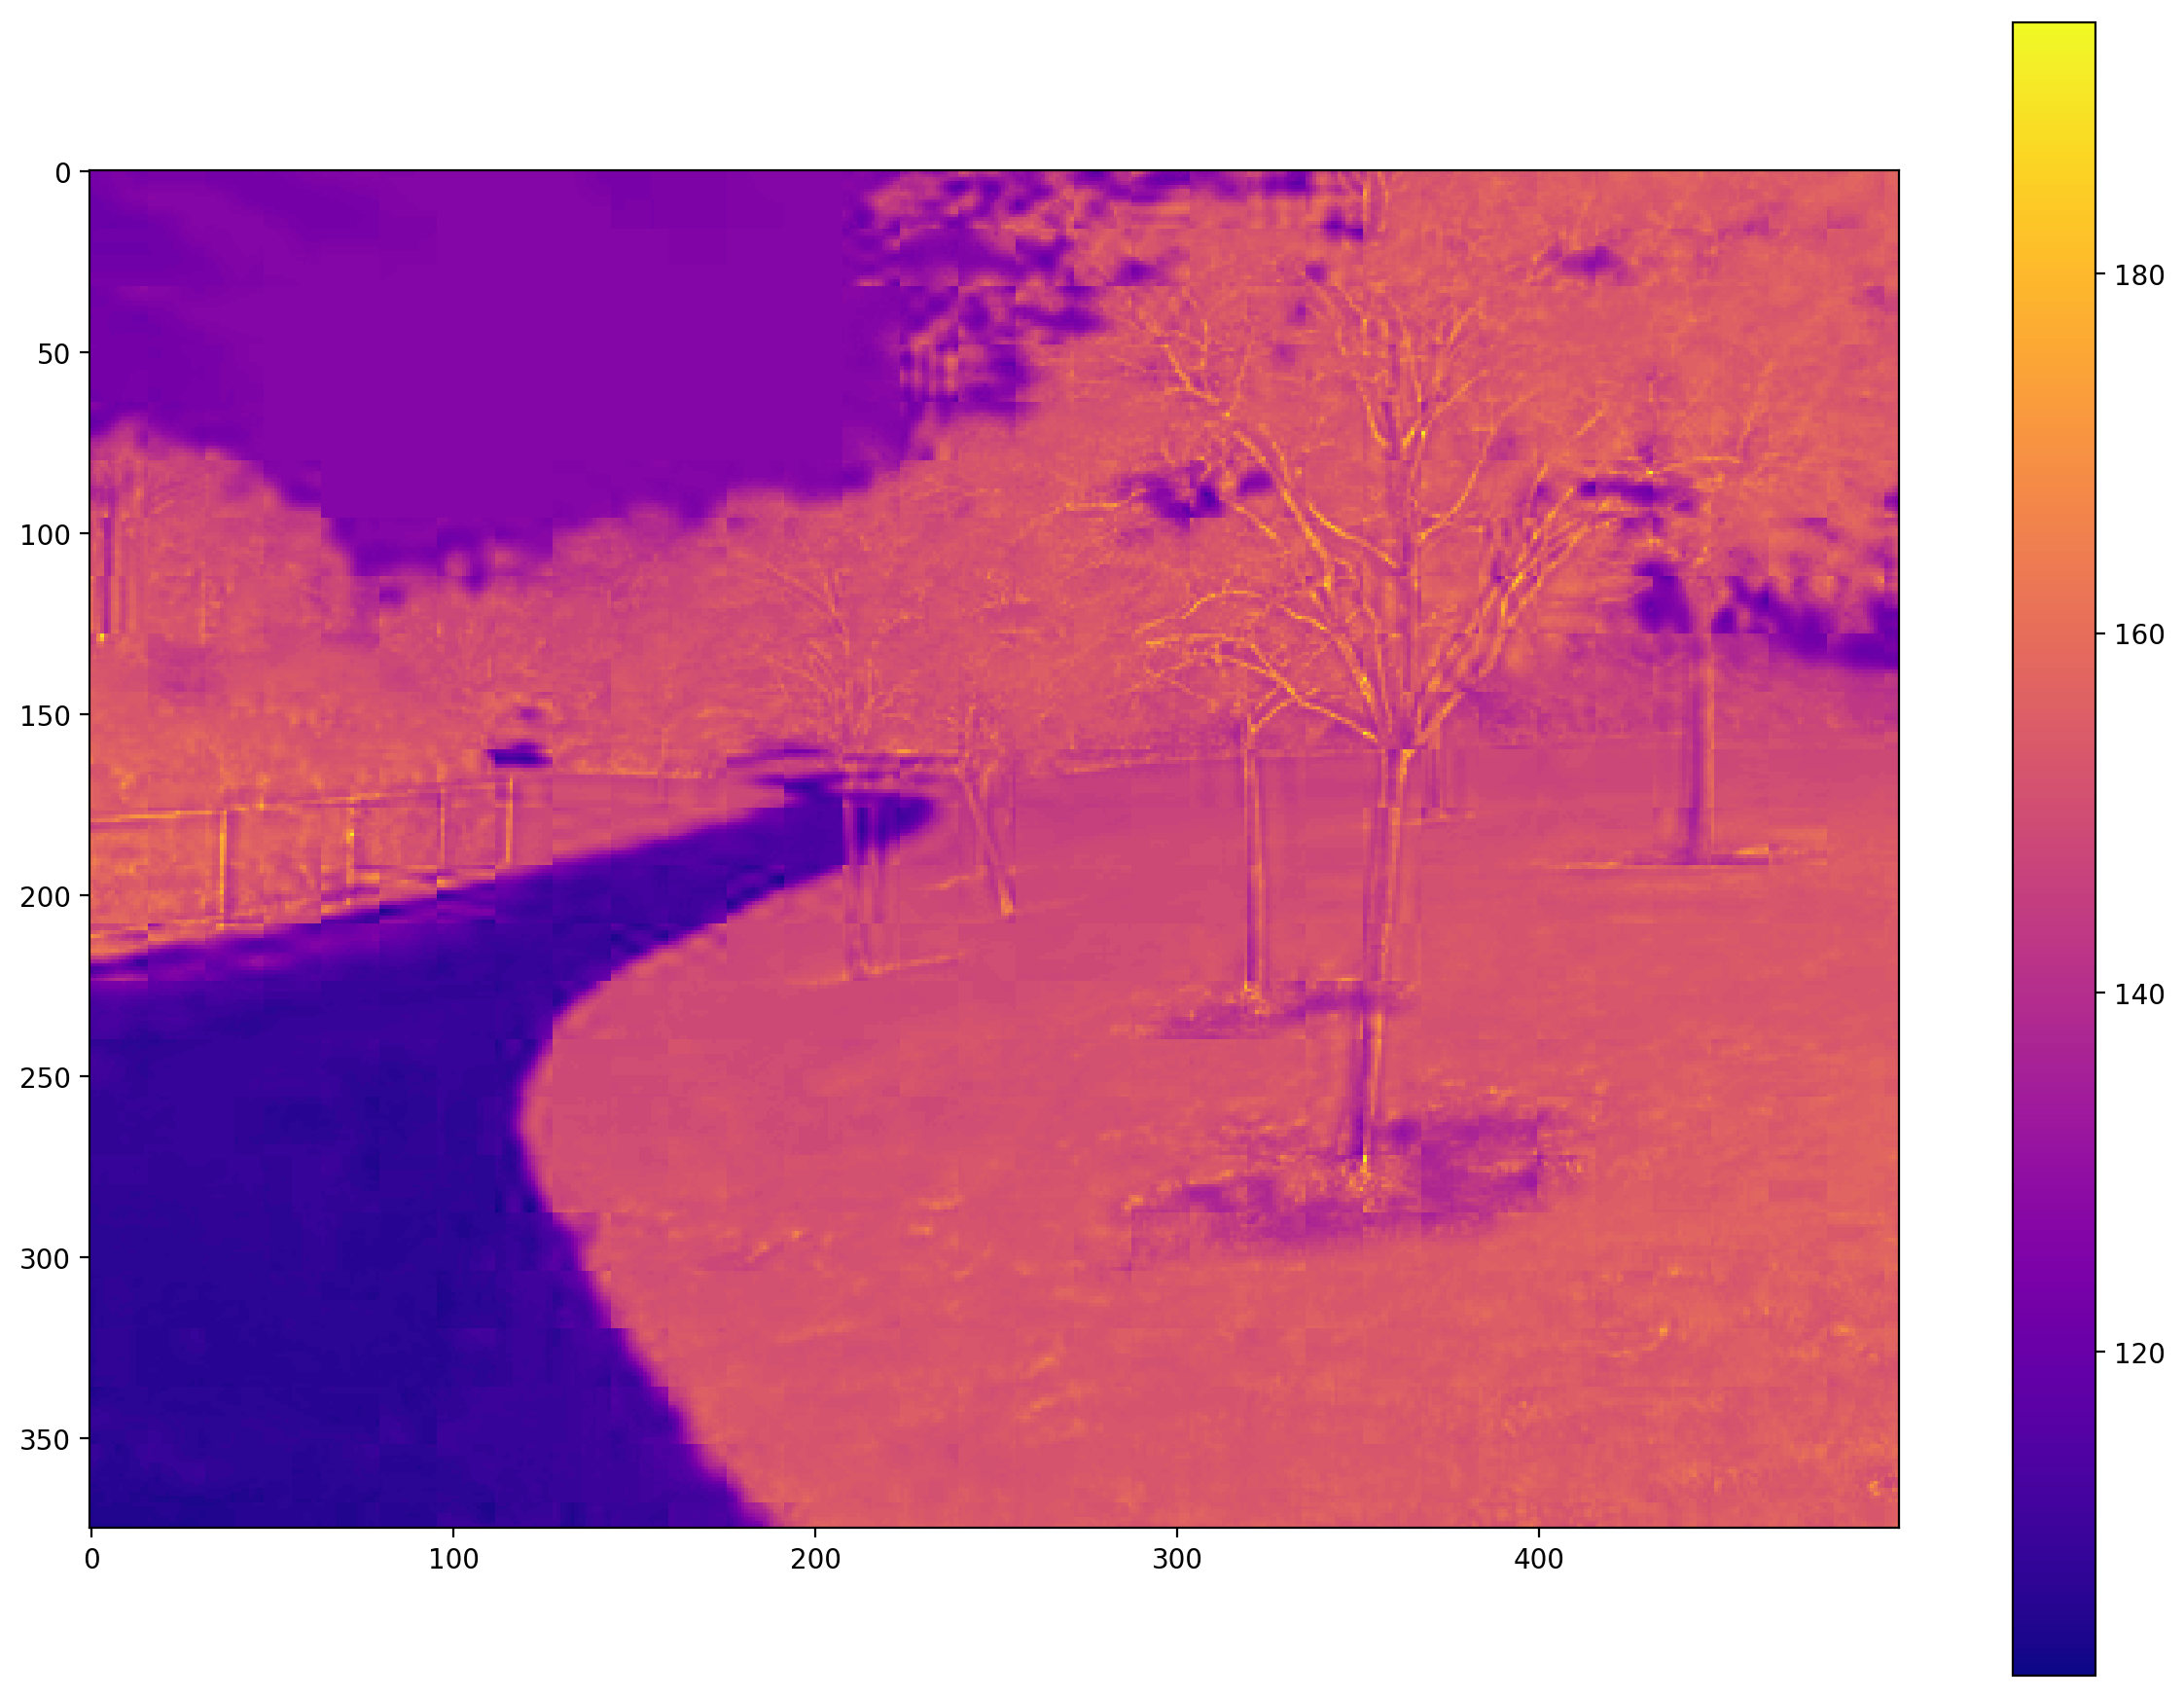

In [147]:
#nir and red_vals swapped - PIL.Image uses B<<16 | G<<8 | R instead of R<<16 | G<<8 | B
nir = red.astype(float)
red_vals = blue.astype(float) #NIR captured by blue band

#compute NDVI and convert to pixel intensity
ndvi = 0
ndvi = (nir-red_vals)/(nir+red_vals)
ndvi = (ndvi*128)+127 
ndvi = ndvi.astype('uint8')

im2 = Image.fromarray(ndvi.T)

plt.figure(figsize=disp_size, dpi=200)
plt.imshow(im2, interpolation='nearest', cmap='plasma')
plt.colorbar()
plt.imsave('../Images/NDVI_gray_river.tiff', im2, cmap='plasma')

In [63]:
print(np.array(im2))
print("max", np.max(np.array(im2)))
print("min ", np.min(np.array(im2)))

[[123 123 123 ..., 157 158 157]
 [123 123 123 ..., 157 157 157]
 [123 123 123 ..., 157 157 157]
 ..., 
 [105 105 105 ..., 155 155 156]
 [104 104 104 ..., 155 156 157]
 [104 104 104 ..., 156 157 159]]
max 194
min  102


In [69]:
help(plt.colorbar)

Help on function colorbar in module matplotlib.pyplot:

colorbar(mappable=None, cax=None, ax=None, **kw)
    Add a colorbar to a plot.
    
    Function signatures for the :mod:`~matplotlib.pyplot` interface; all
    but the first are also method signatures for the
    :meth:`~matplotlib.figure.Figure.colorbar` method::
    
      colorbar(**kwargs)
      colorbar(mappable, **kwargs)
      colorbar(mappable, cax=cax, **kwargs)
      colorbar(mappable, ax=ax, **kwargs)
    
    arguments:
    
      *mappable*
        the :class:`~matplotlib.image.Image`,
        :class:`~matplotlib.contour.ContourSet`, etc. to
        which the colorbar applies; this argument is mandatory for the
        :meth:`~matplotlib.figure.Figure.colorbar` method but optional for the
        :func:`~matplotlib.pyplot.colorbar` function, which sets the
        default to the current image.
    
    keyword arguments:
    
      *cax*
        None | axes object into which the colorbar will be drawn
      *ax*
    

In [74]:
R,G,N = np.array(im.T.astype(float))
print(R)

[[ 237.  240.  241. ...,   92.   90.   89.]
 [ 239.  242.  241. ...,   92.   91.   89.]
 [ 239.  242.  243. ...,   93.   91.   89.]
 ..., 
 [ 172.  173.  171. ...,  149.  147.  143.]
 [ 169.  170.  170. ...,  147.  143.  140.]
 [ 170.  172.  171. ...,  143.  139.  135.]]


In [117]:
import numpy as np
from PIL import Image

import sys
sys.path.append("../../..")
from planthealth.utils import decompose

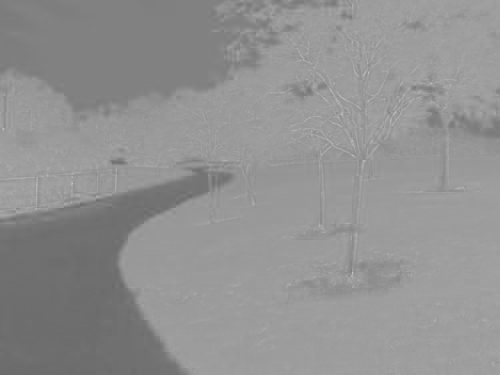

In [145]:
img_path = '../Images/'
img_name = 'river.jpg'
with Image.open(img_path+img_name) as img:
    img = np.array(img.convert('RGB'))
    R,G,N = img.T.astype(float)
NDVI = (N-R)/(N+R) * 128 + 127
NDVI = -NDVI.astype('uint8')
NDVI_img = Image.fromarray(NDVI.T)
NDVI_img.convert(mode='P',palette='adaptive', colors=8)